# QUESTION 1

1. We have data from the questionnaires survey (to ask people opinion) and objective testing with two
attributes (acid durability and strength) to classify whether a special paper tissue is good or not. Here is four
training samples as follows. Apply the K-nearest neighbour’s (KNN) algorithm when K=2, 3 and 4 to classify
an instance (3, 7) as good or bad.Implement the above using python without using scikit learn library. Plot the given samples Bad in Red color
and Good in green color. Also draw the decision boundary. Calculate the distance using Euclidean, Manhattan,
and Minkowski and compare.

In [1]:
import pandas as pd
data=pd.read_csv("datasets/week9Data.csv")
data.head()

,X1,X2,Y
0,7,7,bad
1,7,4,bad
2,3,4,good
3,1,4,good
4,4,5,bad


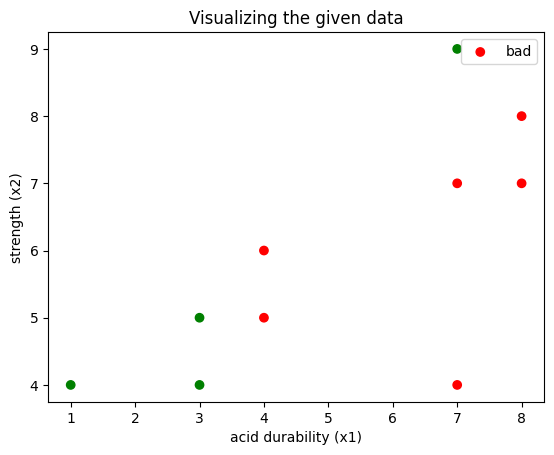

In [2]:
import matplotlib.pyplot as plt
colors = {'good': 'green', 'bad': 'red'}
y_colormap = [colors[f] for f in data['Y']]
plt.scatter(data['X1'], data['X2'], c=y_colormap)
plt.xlabel('acid durability (x1)')
plt.ylabel('strength (x2)')
plt.legend(['bad','good'])
plt.title('Visualizing the given data')
plt.show()

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
input_features = [[3, 7]]
def knn(X,y,metric,kneighs):
    scaler = StandardScaler()
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)
    #knn.fit(X_train, y_train)
    #y_pred = knn.predict(X_test)
    #accuracy = accuracy_score(y_test, y_pred)
    X=scaler.fit_transform(X)
    knn = KNeighborsClassifier(n_neighbors=kneighs,metric=metric)    
    knn.fit(X, y)    
    y_pred = knn.predict(X)
    classify=knn.predict(input_features)
    accuracy = accuracy_score(y, y_pred)
    print(f'{kneighs} neighbours:')
    print(f'prediction for {input_features[0]}={classify[0]}')
    print(f'Accuracy: {accuracy}')    
    return y_pred

In scikit-learn's implementation of the k-nearest neighbors (KNN) algorithm, ties in class predictions are broken by considering the nearest neighbors in the order they appear. When there's a tie in class labels among the k-nearest neighbors, the algorithm will choose the class label of the nearest neighbor that appears first in the dataset as the prediction.

In [4]:
def plotValues(y,y_pred):
    # Define colors for 'good' and 'bad' labels
    colors = {'good': 'green', 'bad': 'red'}
    # Create a colormap for the actual 'Y' labels
    y_colormap_actual = [colors[label] for label in data['Y']]
    # Create a colormap for the predicted 'Y' labels
    y_colormap_pred = [colors[label] for label in y_pred]
    # Create a scatter plot for actual 'Y' values
    plt.scatter(data['X1'], data['X2'], c=y_colormap_actual, label='Actual Y')
    # Overlay a scatter plot for predicted 'Y' values
    plt.scatter(data['X1'], data['X2'], c=y_colormap_pred, marker='x', label='Predicted Y')
    # Set labels for the axes
    plt.xlabel('acid durability (x1)')
    plt.ylabel('strength (x2)')
    # Add legend
    plt.legend()
    # Show the plot
    #plt.show()

In [104]:
X = data.drop('Y', axis=1)
y = data['Y']
distances=['euclidean', 'manhattan', 'minkowski']
neighbours=[2,3,4]
predictions=[]
for dist in distances:
    print(f'KNN using {dist}:')
    for k in neighbours:
        pred=knn(X,y,dist,k)
        predictions.append(pred)
    print('------------------------------------------')

KNN using euclidean:
2 neighbours:
prediction for [3, 7]=bad
Accuracy: 0.8
3 neighbours:
prediction for [3, 7]=bad
Accuracy: 0.9
4 neighbours:
prediction for [3, 7]=bad
Accuracy: 0.8
------------------------------------------
KNN using manhattan:
2 neighbours:
prediction for [3, 7]=bad
Accuracy: 0.8
3 neighbours:
prediction for [3, 7]=bad
Accuracy: 0.9
4 neighbours:
prediction for [3, 7]=bad
Accuracy: 0.8
------------------------------------------
KNN using minkowski:
2 neighbours:
prediction for [3, 7]=bad
Accuracy: 0.8
3 neighbours:
prediction for [3, 7]=bad
Accuracy: 0.9
4 neighbours:
prediction for [3, 7]=bad
Accuracy: 0.8
------------------------------------------


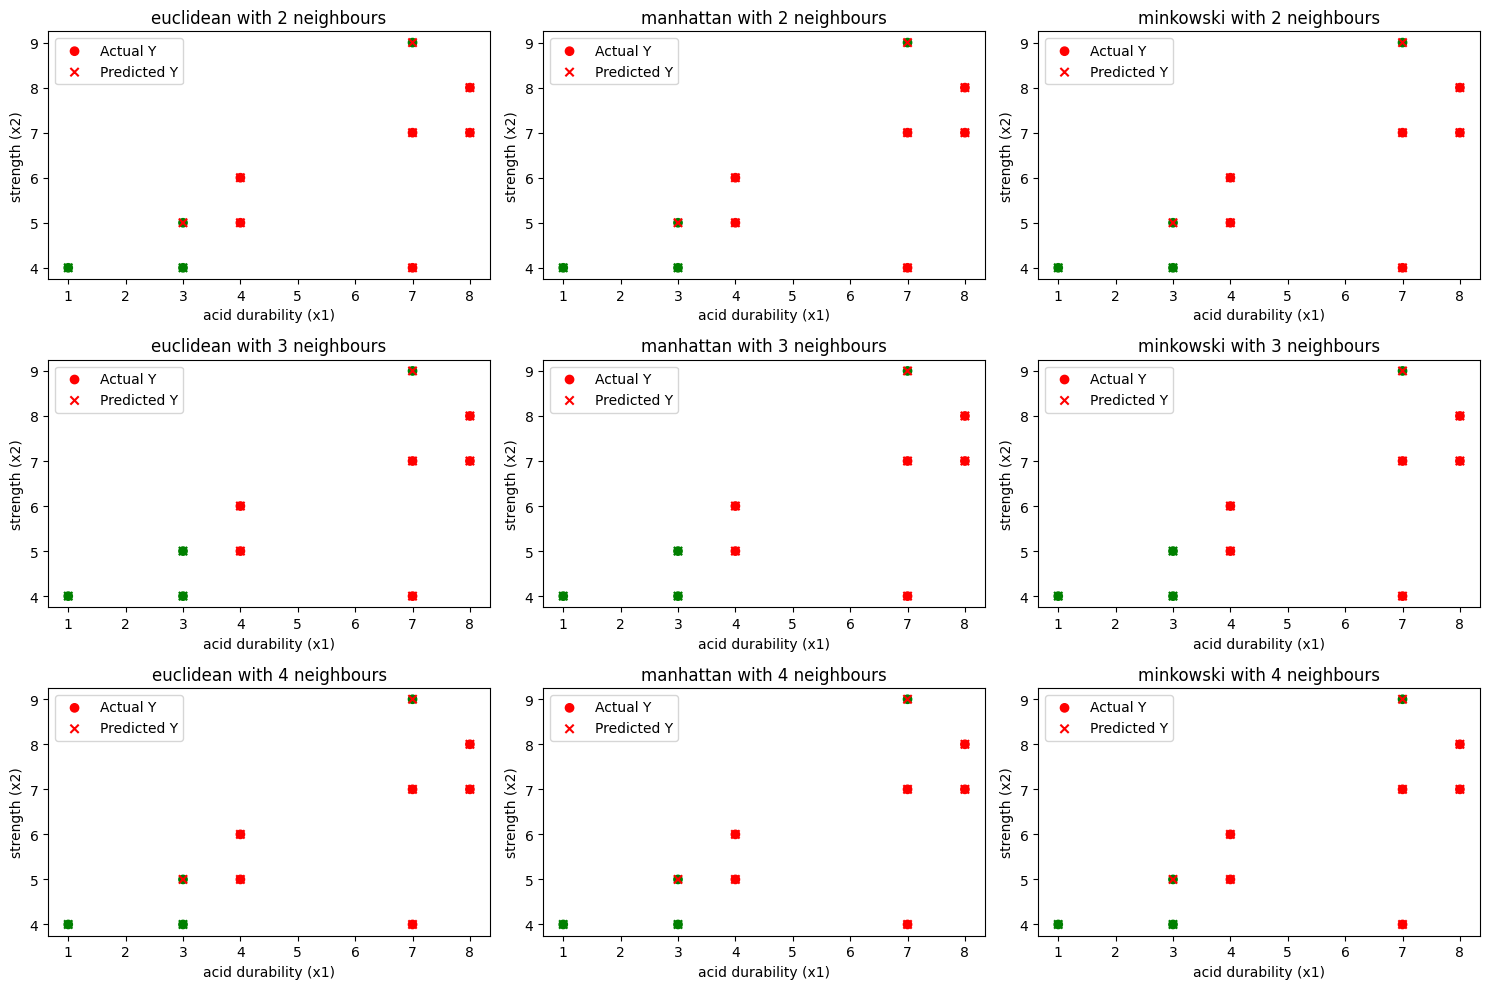

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.title('euclidean with 2 neighbours')
plotValues(y,predictions[0])
plt.subplot(3,3,2)
plt.title('manhattan with 2 neighbours')
plotValues(y,predictions[1])
plt.subplot(3,3,3)
plt.title('minkowski with 2 neighbours')
plotValues(y,predictions[2])

plt.subplot(3,3,4)
plt.title('euclidean with 3 neighbours')
plotValues(y,predictions[3])
plt.subplot(3,3,5)
plt.title('manhattan with 3 neighbours')
plotValues(y,predictions[4])
plt.subplot(3,3,6)
plt.title('minkowski with 3 neighbours')
plotValues(y,predictions[5])

plt.subplot(3,3,7)
plt.title('euclidean with 4 neighbours')
plotValues(y,predictions[6])
plt.subplot(3,3,8)
plt.title('manhattan with 4 neighbours')
plotValues(y,predictions[7])
plt.subplot(3,3,9)
plt.title('minkowski with 4 neighbours')
plotValues(y,predictions[8])
plt.tight_layout()

# QUESTION 2

2. Implement the Question number 1 without using scikit learn library. Plot the given samples Bad in Red color
and Good in green color. Also plot the decision boundary. Calculate the distance using Euclidean, Manhattan,
and Minkowski and compare.

In [40]:
import pandas as pd
data=pd.read_csv("datasets/week9Data.csv")
data

,X1,X2,Y
0,7,7,bad
1,7,4,bad
2,3,4,good
3,1,4,good
4,4,5,bad
5,3,5,good
6,4,6,bad
7,8,7,bad
8,7,9,good
9,8,8,bad


In [109]:
#feature extraction
x1s=list(data['X1'])
x2s=list(data['X2'])
y=list(data['Y'])
inputs=[]
for x1,x2 in zip(x1s,x2s):
    point=[x1,x2]
    inputs.append(point)
inputFeature=[3,7]
class1=(list(set(y)))[0]
class2=(list(set(y)))[1]
k=[2,3,4]
distances=['euclidean', 'manhattan', 'minkowski']
inputs

[[7, 7],
 [7, 4],
 [3, 4],
 [1, 4],
 [4, 5],
 [3, 5],
 [4, 6],
 [8, 7],
 [7, 9],
 [8, 8]]

In [113]:
def knearestneigh(ipf,ips,y,k,metric,class1,class2):
    neighbourDistances={}
    n=len(ips)
    for i in range(n):
        if metric=='euclidean':
            dist=(ipf[0]-ips[i][0])**2+(ipf[1]-ips[i][1])**2 #ignoring square root
        if metric=='manhattan':
            dist=abs(ipf[0]-ips[i][0]) + abs(ipf[1]-ips[i][1])
        if metric=='minkowski':
            dist=(ipf[0]-ips[i][0])**3+(ipf[1]-ips[i][1])**3 #substituting value of p as 3 in minkowski distance
        neighbourDistances[i]=dist
    sorted_dists = dict(sorted(neighbourDistances.items(), key=lambda item: item[1]))
    knearest=[]
    i=0
    for neighbor in sorted_dists.keys():
        if i<k:
            knearest.append(neighbor)
            i+=1
    c1,c2=0,0    
    for i in range(k):
        # print(y[knearest[i]])
        if y[knearest[i]]==class1:
            c1+=1
        if y[knearest[i]]==class2:
            c2+=1    
    print(f'{k} neighbours:')
    if c1>c2: print(f'the input feature {ipf} is classified as {class1}.')
    elif c2>c1: print(f'the input feature {ipf} is classified as {class2}.')
    else: print(f'the input feature {ipf} cannot be classified.') 
        

In [114]:
for metric in distances:
    print(f'KNN using {metric}:')
    for ele in k:
        knearestneigh(inputFeature,inputs,y,ele,metric,class1,class2)
    print('-------------------------------------------------')

KNN using euclidean:
2 neighbours:
the input feature [3, 7] cannot be classified.
3 neighbours:
the input feature [3, 7] is classified as bad.
4 neighbours:
the input feature [3, 7] cannot be classified.
-------------------------------------------------
KNN using manhattan:
2 neighbours:
the input feature [3, 7] cannot be classified.
3 neighbours:
the input feature [3, 7] is classified as good.
4 neighbours:
the input feature [3, 7] cannot be classified.
-------------------------------------------------
KNN using minkowski:
2 neighbours:
the input feature [3, 7] is classified as bad.
3 neighbours:
the input feature [3, 7] is classified as bad.
4 neighbours:
the input feature [3, 7] is classified as bad.
-------------------------------------------------
